# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [98]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [99]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries, countries_by_name
from datetime import datetime, timedelta

### Notebook Presentation

In [100]:
pd.options.display.float_format = '{:,.2f}'.format


### Load the Data

In [101]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

In [102]:
df_data.shape

(4324, 9)

In [103]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [104]:
df_data.drop(df_data.columns[[0,1]], axis = 1, inplace = True)

In [105]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


## Data Cleaning - Checking for Missing Values and Duplicates

In [106]:
df_data.isna().values.any()

True

In [107]:
df_data[df_data.isna().any(axis=1)]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [108]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [109]:
# replacing NaN price with 0
df_data['Price'] = df_data['Price'].fillna(0)

In [110]:
df_data.isna().values.any()

False

In [111]:
df_data.isnull().values.any()

False

In [112]:
df_data.duplicated().values.any()

True

In [113]:
duplicated_rows = df_data[df_data.Detail.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(46, 7)


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
519,MHI,"LA-Y1, Tanegashima Space Center, Japan","Sun Feb 01, 2015 01:21 UTC",H-IIA 202 | IGS-Radar 5,StatusActive,90.0,Success
632,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Sat Sep 22, 2012",Safir-1B+ | Unknown Payload,StatusActive,0,Failure
646,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Wed May 23, 2012",Safir-1B+ | Unknown Payload,StatusActive,0,Failure
793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success
1133,Lockheed,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Aug 06, 2001 07:28 UTC",Titan IV(402)B | DSP,StatusRetired,0,Success


In [114]:
df_data = df_data.drop_duplicates(subset = ['Detail'])
df_data.shape

(4278, 7)

## Descriptive Statistics

In [115]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4278,4278,4278,4278,4278,4278,4278
unique,56,136,4274,4278,2,57,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Molniya-M /Block ML | Molniya-1 n†­130,StatusRetired,0,Success
freq,1759,235,2,1,3492,3316,3846


In [116]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4278 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4278 non-null   object
 1   Location        4278 non-null   object
 2   Date            4278 non-null   object
 3   Detail          4278 non-null   object
 4   Rocket_Status   4278 non-null   object
 5   Price           4278 non-null   object
 6   Mission_Status  4278 non-null   object
dtypes: object(7)
memory usage: 267.4+ KB


# Number of Launches per Company

In [117]:
launch = df_data['Organisation'].value_counts()

In [118]:
launch.head()

RVSN USSR           1759
Arianespace          279
General Dynamics     251
CASC                 250
NASA                 203
Name: Organisation, dtype: int64

In [119]:
bar = px.bar(x = launch.index, # index = category name
             y = launch.values,
              title='Space Launches by Organisation')
bar.update_layout(xaxis_title='Organisation',
                 yaxis_title='Number of Launches')
bar.show()

In [120]:
#Top 10 Organisations
launch2 = launch[:10]

In [121]:
bar2 = px.bar(x = launch2.index, # index = category name
             y = launch2.values,
              title='Space Launches by Organisation (Top 10)')
bar2.update_layout(xaxis_title='Organisation',
                 yaxis_title='Number of Launches')
bar2.show()

In [122]:
#Removing RVSN USSR to see better scope
launch3 = launch.drop('RVSN USSR')
bar3 = px.bar(x=launch3.index,
             y=launch3.values,
             title='Space Launches by Organisation (excluding Soviet RVSN USSR)')
bar3.update_layout(xaxis_title='Organisation', yaxis_title='Number of Launches')
bar3.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [123]:
active = df_data.Rocket_Status.value_counts()
active

StatusRetired    3492
StatusActive      786
Name: Rocket_Status, dtype: int64

In [124]:
pie = px.pie(labels=active.index,
            values=active.values,
            title='Number of Active Vs Retired Rockets',
            names=active.index)
pie.update_traces(textposition='outside', textinfo='percent+label')
pie.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [125]:
status = df_data.Mission_Status.value_counts()
status

Success              3846
Failure               326
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [126]:
pie = px.pie(labels=status.index,
            values=status.values,
            title='Distribution of Mission Status',
            names=status.index)
pie.update_traces(textposition='outside', textinfo='percent+label')
pie.show()

# How Expensive are the Launches?  

In [127]:
#drop rows with missing price or price = 0

In [128]:
expense = df_data.loc[(df_data != 0).any(axis=1)]
#Converting Price to numeric
expense.Price = expense.Price.astype(str).str.replace(',', '')
expense.Price = pd.to_numeric(expense.Price)
expense.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4278 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4278 non-null   object 
 1   Location        4278 non-null   object 
 2   Date            4278 non-null   object 
 3   Detail          4278 non-null   object 
 4   Rocket_Status   4278 non-null   object 
 5   Price           4278 non-null   float64
 6   Mission_Status  4278 non-null   object 
dtypes: float64(1), object(6)
memory usage: 267.4+ KB


<AxesSubplot:xlabel='Price', ylabel='Count'>

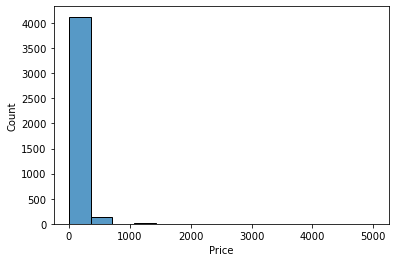

In [129]:
sns.histplot(data=expense, x='Price')

In [130]:
df = expense[expense.Price > 2000]
expense2 = expense.drop(df.index, axis=0)

<AxesSubplot:xlabel='Price', ylabel='Count'>

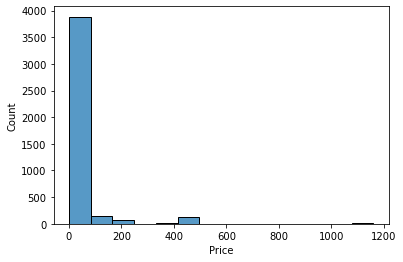

In [131]:
sns.histplot(data=expense2, x='Price')

# Use a Choropleth Map to Show the Number of Launches by Country
Location has to be changed to fit ISO.
* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA

In [132]:
df_data2 = df_data
#changing values of country to match ISO
df_data2.Location = df_data2.Location.str.replace("USA","UNITED STATES OF AMERICA")
df_data2.Location = df_data2.Location.str.replace("Gran Canaria","UNITED STATES OF AMERICA")
df_data2.Location = df_data2.Location.str.replace("Russia","RUSSIAN FEDERATION")
df_data2.Location = df_data2.Location.str.replace("Barents Sea","RUSSIAN FEDERATION")
df_data2.Location = df_data2.Location.str.replace("New Mexico","UNITED STATES OF AMERICA")
df_data2.Location = df_data2.Location.str.replace("Yellow Sea","CHINA")
df_data2.Location = df_data2.Location.str.replace("Shahrud Missile Test Site","Iran")
df_data2.Location = df_data2.Location.str.replace("Pacific Ocean","UNITED STATES OF AMERICA")
df_data2.Location = df_data2.Location.str.replace("Pacific Missile Range Facility","UNITED STATES OF AMERICA")
 
#splitting location column, space removed with lstrip
df_country = df_data2["Location"].str.split(",", expand=True).reset_index()
df_country[3] = df_country[3].str.lstrip(" ")
 
#moving country to new df
col_1 = df_country[1]
col_2 = df_country[2]
col_3 = df_country[3]
new_df = []
for one, two, three in zip(col_1, col_2, col_3):
    if three is None:
        three = two
    if three is None:
        three = one
    new_df.append(three)
 
#changing names to match iso

country_iso = []
for country in new_df:
    country = country.lstrip(" ")
    if country == "Iran":
        country = "IRAN, ISLAMIC REPUBLIC OF"
    if country == "North Korea":
        country = "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF"
    if country == "South Korea":
        country = "KOREA, REPUBLIC OF"
    try:
        country_iso.append(countries_by_name[country.upper()][2])
    except KeyError:
        print (country)
 
#adding new column to original df

df_data2["Country_ISO"] = pd.DataFrame(country_iso)

In [133]:
df_choropleth = df_data2.groupby(["Country_ISO"], as_index=False).agg({"Detail":pd.Series.count})
df_choropleth.rename(columns={"Detail":"Launch_Counts"}, inplace=True)
df_choropleth.sort_values("Launch_Counts", ascending=False)
 
fig = px.choropleth(df_choropleth, locations="Country_ISO", color="Launch_Counts", color_continuous_scale="sunsetdark")
fig.show()

# Using a Choropleth Map to Show the Number of Failures by Country


In [134]:
df_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4278 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4278 non-null   object
 1   Location        4278 non-null   object
 2   Date            4278 non-null   object
 3   Detail          4278 non-null   object
 4   Rocket_Status   4278 non-null   object
 5   Price           4278 non-null   object
 6   Mission_Status  4278 non-null   object
 7   Country_ISO     4232 non-null   object
dtypes: object(8)
memory usage: 300.8+ KB


In [135]:
failure_df = df_data2[['Country_ISO', 'Mission_Status']]
failure_df = failure_df[failure_df['Mission_Status'] != 'Success']
failure_df = failure_df.groupby(['Country_ISO'], as_index=False).agg({'Mission_Status': pd.Series.count}).sort_values('Mission_Status')


In [136]:
failure_map = px.choropleth(failure_df,
                           locations='Country_ISO',
                           color='Mission_Status',
                           hover_name='Country_ISO',
                           color_continuous_scale=px.colors.sequential.matter,
                           title='Space Launches That Ended in Failure')
failure_map.show()

# Creating a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [137]:
df_mission = df_data.groupby(['Country_ISO',
                                  'Organisation',
                                  'Mission_Status'], as_index=False).agg({'Detail': pd.Series.count}).rename(columns={'Detail': 'Count'})
df_mission

,Country_ISO,Organisation,Mission_Status,Count
0,AUS,General Dynamics,Success,1
1,AUS,ISAS,Success,1
2,AUS,RVSN USSR,Failure,1
3,AUS,RVSN USSR,Partial Failure,1
4,AUS,RVSN USSR,Success,2
...,...,...,...,...
337,USA,VKS RF,Failure,4
338,USA,VKS RF,Partial Failure,1
339,USA,VKS RF,Success,74
340,USA,Virgin Orbit,Failure,1


In [138]:
sunburst = px.sunburst(df_mission,
                   path=['Country_ISO', 'Organisation', 'Mission_Status'],
                   values='Count',
                   title='National Space Launches',
                   width=800,
                   height=800)
sunburst.show()

# Analysing the Total Amount of Money Spent by Organisation on Space Missions

In [139]:
expense.Price = pd.to_numeric(expense.Price)
expense2 = expense.groupby('Organisation', as_index=False).agg({'Price': pd.Series.sum}).sort_values('Price', ascending=True)

In [140]:
bar = px.bar(x=expense2.Price,
                    y=expense2.Organisation,
                    orientation='h',
                    color=expense2.Price,
                    color_continuous_scale=px.colors.sequential.BuPu,
                    title='Total Money Spent by Organisation')
bar.update_layout(xaxis_title='Amount (USD millions)',
                         yaxis_title='Organisation')
bar.show()

# Analysing the Amount of Money Spent by Organisation per Launch

In [141]:
expense_per_launch = expense.groupby('Organisation', as_index=False).agg({'Price': pd.Series.mean}).sort_values('Price', ascending=True)
expense_per_launch.head()

,Organisation,Price
0,AEB,0.00
22,ISAS,0.00
25,KARI,0.00
26,KCST,0.00
54,Yuzhmash,0.00


In [142]:
bar = px.bar(x=expense_per_launch.Price,
                    y=expense_per_launch.Organisation,
                    orientation='h',
                    #color =
                    #color_continuous_scale=px.colors.sequential.BuPu,
                    title='Average Money Spent by Organisation')
bar.update_layout(xaxis_title='Amount (USD millions)',
                         yaxis_title='Organisation')
bar.show()

# Charting the Number of Launches per Year

In [143]:
# creating year column
df_data['Year'] = pd.to_datetime(df_data.Date)
separated_date = df_data.Year.astype(str).str.split(" ", expand=True)
df_data.Year = separated_date[0]
df_data.Year = df_data.Year.astype(str).str.split('-', expand=True)[0]
df_data.Year = pd.to_numeric(df_data.Year)

# creating a launch per year df 
launchs = df_data.copy()
launchs = launchs.groupby('Year').count().Detail
display(launchs)

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Detail, Length: 64, dtype: int64

In [144]:
bar = px.bar(x=launchs.index,
                     y=launchs.values,
                      labels=dict(x='Year', y='Nr. of Launches'))
bar.update_layout(title='Yearly Space Launches')
bar.show()

# Charting the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [145]:
launchs2 = df_data.copy()
launchs2.Date = pd.to_datetime(launchs2.Date)
separated_date = launchs2.Date.astype(str).str.split(" ", expand=True)
launchs2.Date = separated_date[0]
launchs2.Date = pd.to_datetime(launchs2.Date)

launchs2.Date = launchs2.Date.dt.month

# Counting monthly launches
launchs2 = launchs2.groupby('Date').count().Detail
launchs2.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                         'October', 'November', 'December']
display(launchs2)

# rolling average
month_average = launchs2.rolling(window=2).mean()

January      268
February     333
March        351
April        377
May          320
June         396
July         349
August       370
September    359
October      378
November     331
December     446
Name: Detail, dtype: int64

In [146]:
launch_month = px.line(x=launchs2.index,
                     y=month_average.values,
                      color=px.Constant('Moving Average'),
                      labels=dict(x="Month", y='Nr. of Launches'))
launch_month.add_bar(x=launchs2.index,
                    y=launchs2.values,
                    name='Total Launches')
launch_month.update_layout(title='Monthly Space Launches')
launch_month.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [147]:
#need to add

# How has the Launch Price varied Over Time? 

In [148]:
avg_price = expense.loc[:,('Date', 'Detail', 'Price')]
avg_price.Date = pd.to_datetime(avg_price.Date)
avg_price.Date = avg_price.Date.astype(str).str.split('-', expand=True)[0]
avg_price.Date = pd.to_numeric(avg_price.Date)

avg_price = avg_price.groupby('Date').agg({'Price': pd.Series.mean})

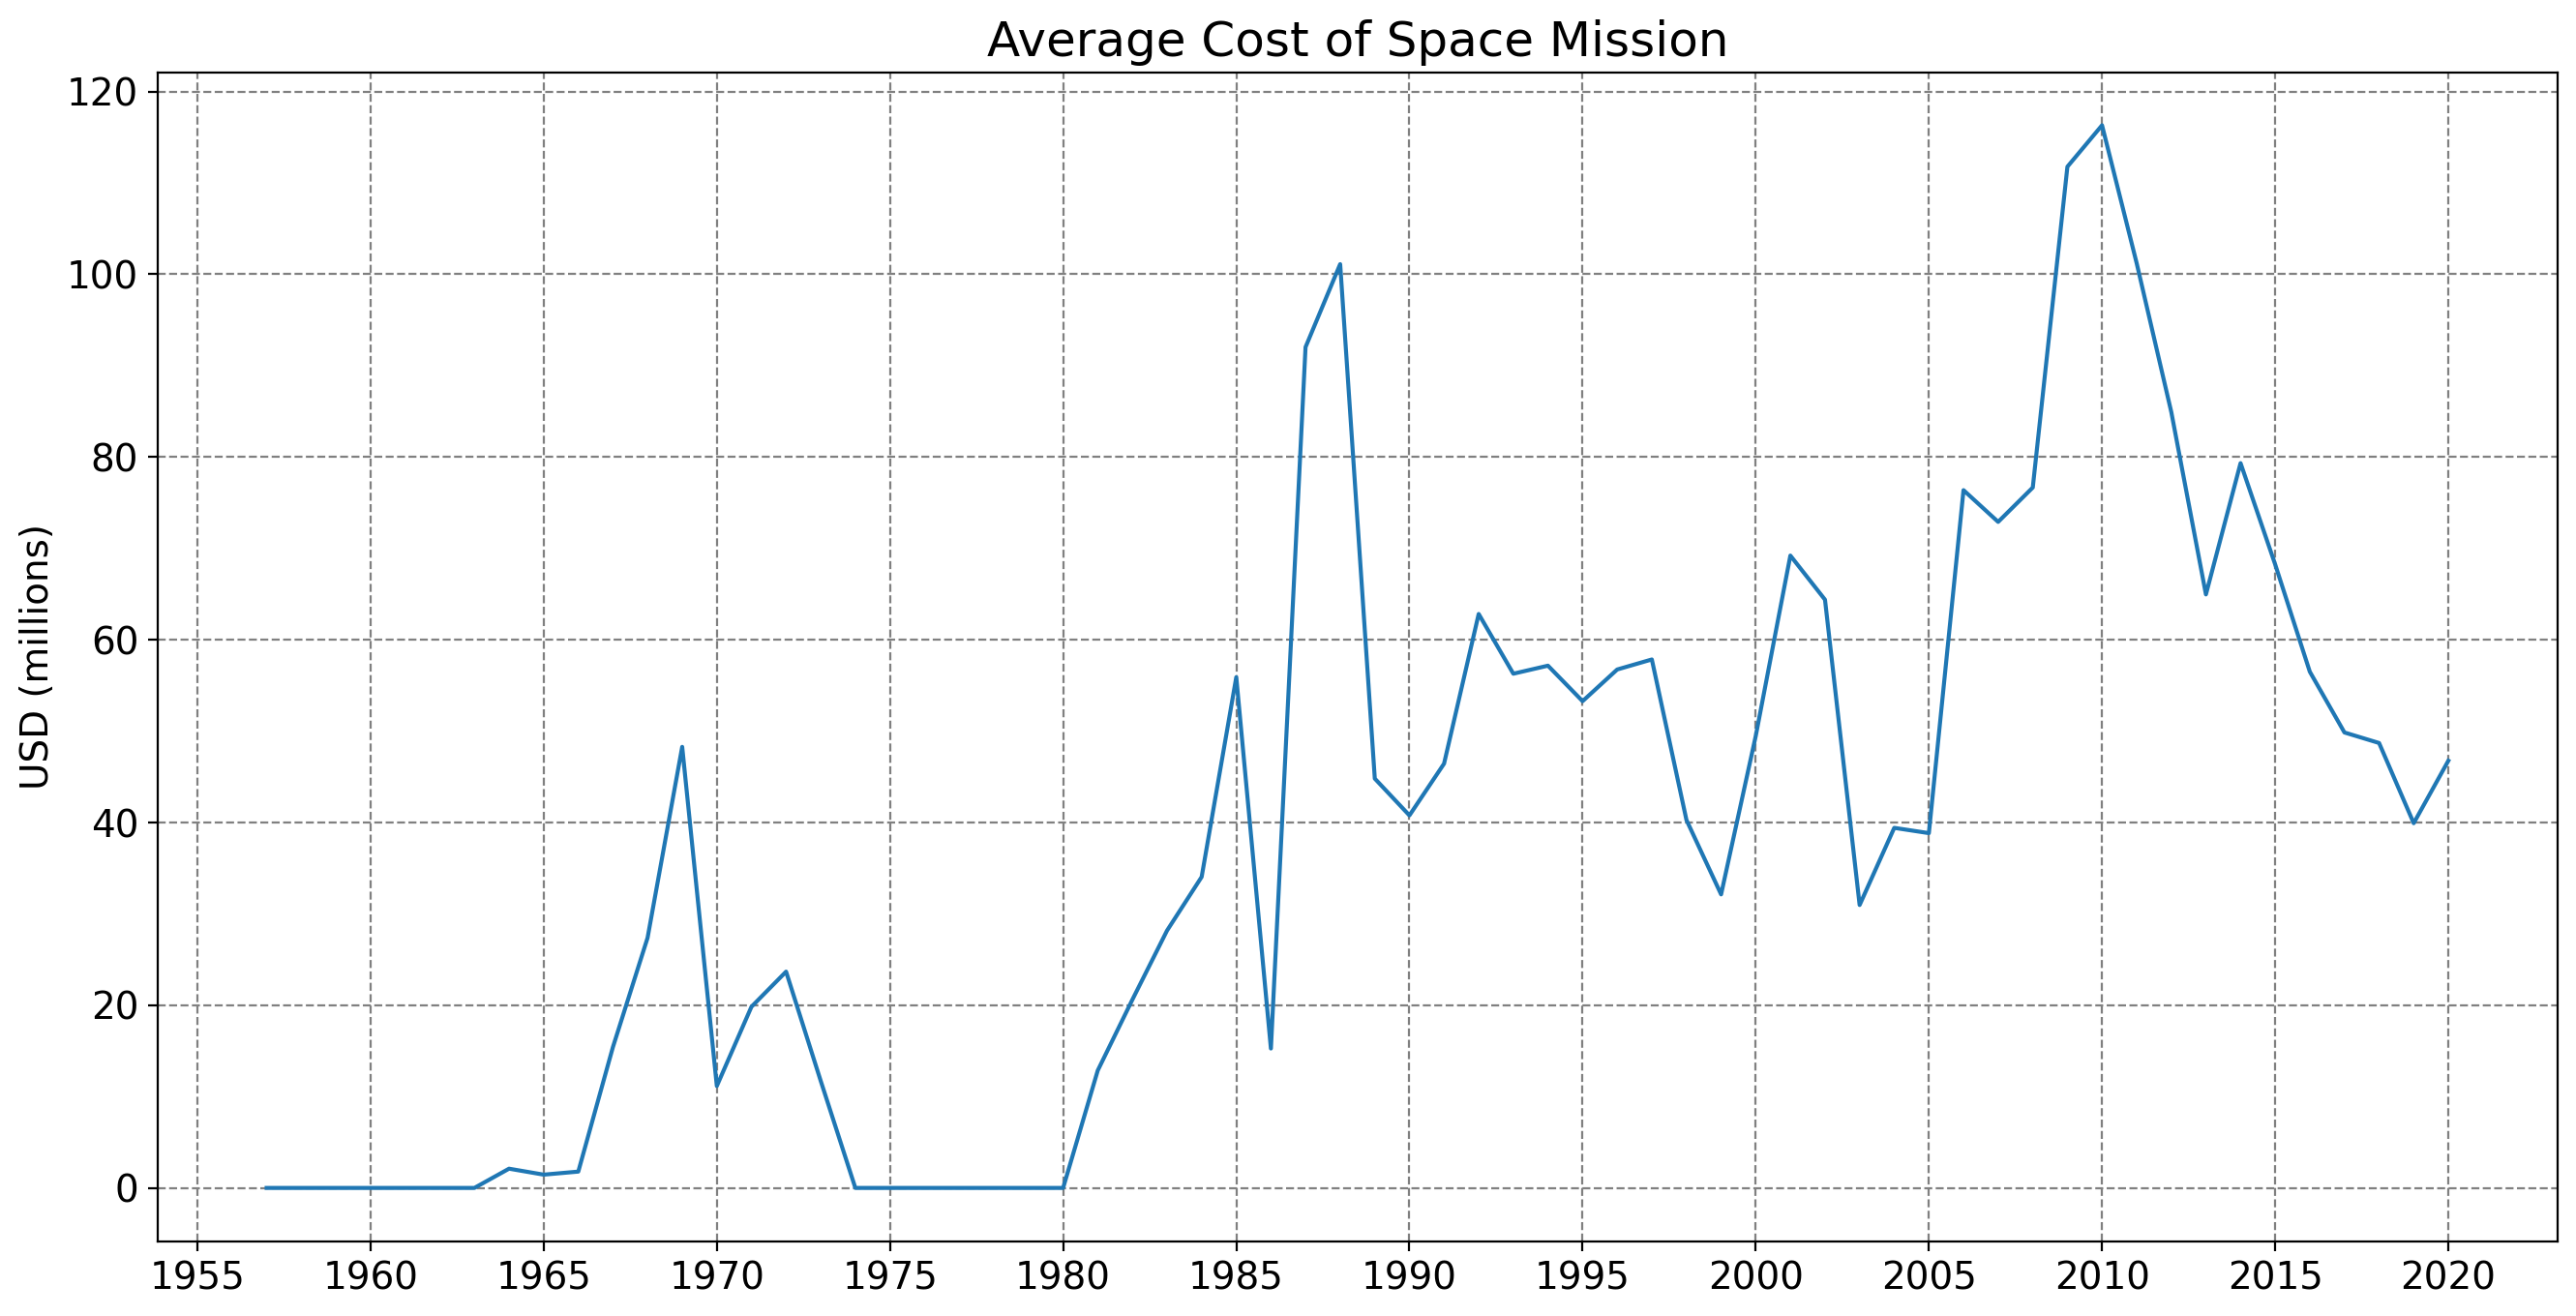

In [149]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Average Cost of Space Mission', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, ticks=np.arange(1955, 2021, step=5))

plt.ylabel('USD (millions)', fontsize=14)

plt.grid(color='grey', linestyle='--')
plt.plot(avg_price.index,
        avg_price.values)
plt.show()

# Charting the Number of Launches over Time by the Top 10 Organisations. 

In [150]:
# Finding the top 10 organisations
top10_org = df_data.groupby('Organisation', as_index=False).count()
top10_org = top10_org.sort_values('Detail', ascending=False)[:10]
top10_org = top10_org.Organisation
top10_org = [x for x in top10_org.values]
display(top10_org)

# creating a dataframe for only the top 10 orgs
launches_by_year = df_data.groupby(['Organisation', 'Year'], as_index=False).count()
launches_by_year = launches_by_year.sort_values('Year')[['Year', 'Organisation', 'Detail']]
launches_by_year.rename(columns={'Detail': 'Nr_Launch'}, inplace=True)
launches_by_year = launches_by_year.loc[(launches_by_year.Organisation == top10_org[0]) | 
                                        (launches_by_year.Organisation == top10_org[1]) |
                                        (launches_by_year.Organisation == top10_org[2]) |
                                        (launches_by_year.Organisation == top10_org[3]) |
                                        (launches_by_year.Organisation == top10_org[4]) |
                                        (launches_by_year.Organisation == top10_org[5]) |
                                        (launches_by_year.Organisation == top10_org[6]) |
                                        (launches_by_year.Organisation == top10_org[7]) |
                                        (launches_by_year.Organisation == top10_org[8]) |
                                        (launches_by_year.Organisation == top10_org[9])]

['RVSN USSR',
 'Arianespace',
 'General Dynamics',
 'CASC',
 'NASA',
 'VKS RF',
 'US Air Force',
 'ULA',
 'Boeing',
 'Martin Marietta']

In [151]:
cumulative_launch = launches_by_year.groupby(['Organisation', 'Year']).sum().groupby(level=[0]).cumsum()
cumulative_launch.reset_index(inplace=True)
cumulative_launch.head()

,Organisation,Year,Nr_Launch
0,Arianespace,1984,3
1,Arianespace,1985,7
2,Arianespace,1986,10
3,Arianespace,1987,12
4,Arianespace,1988,18


In [152]:
line_chart = px.line(cumulative_launch,
                    x='Year',
                    y='Nr_Launch',
                    color='Organisation',
                    hover_name='Organisation')
line_chart.update_layout(xaxis_title='Year',
                        yaxis_title='Nr. of Space Missions',
                        title='Top 10 Organisation Space Launches over Time')
line_chart.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [154]:
# Creating a dataframe with only the US and the USSR up until 1991
cold_war = df_data.loc[(df_data.Organisation == 'RVSN USSR') |
                      (df_data.Country_ISO == 'USA')]
after_war = cold_war[cold_war.Year > 1991]
cold_war = cold_war.drop(after_war.index)
cold_war.reset_index(inplace=True)

# Creating an affiliation column for easier reference between the 2 powers
affiliation = []
for x in range(0, len(cold_war)):
    if cold_war.Country_ISO[x] == 'RUS':
        affiliation.append('USSR')
    else:
        affiliation.append('USA')
cold_war['Affiliation'] = affiliation
cold_war.head(20)

,index,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_ISO,Year,Affiliation
0,1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan","Fri Dec 20, 1991",Rokot/Briz K | GVM Demo Flight,StatusRetired,0,Success,RUS,1991,USSR
1,1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, RUSSIAN FEDERA...","Wed Dec 18, 1991 03:54 UTC",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,0,Success,USA,1991,USA
2,1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, RUSSIAN FEDER...","Wed Nov 27, 1991 03:30 UTC",Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,0,Success,JPN,1991,USA
3,1725,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, RUSSIAN FEDERA...","Tue Nov 12, 1991 20:09 UTC",Tsyklon-3 | Cosmos 2165 to 2170,StatusRetired,0,Success,RUS,1991,USSR
4,1728,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, RUSSIAN FEDER...","Thu Oct 10, 1991 14:00 UTC",Cosmos-3M (11K65M) | Cosmos 2164,StatusRetired,0,Success,USA,1991,USA
5,1729,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, RUSSIAN FEDERA...","Sat Sep 28, 1991 07:05 UTC",Tsyklon-3 | Cosmos 2157 to 2162,StatusRetired,0,Success,RUS,1991,USSR
6,1730,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Thu Sep 26, 1991 23:43 UTC",Ariane 44P | Anik E1,StatusRetired,0,Success,USA,1991,USA
7,1731,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, RUSSIAN FEDERA...","Tue Sep 17, 1991 20:01 UTC",Molniya-M /Block ML | Molniya-3 n†­151,StatusRetired,0,Success,FRA,1991,USA
8,1732,NASA,"LC-39A, Kennedy Space Center, Florida, UNITED ...","Thu Sep 12, 1991 23:11 UTC",Space Shuttle Discovery | STS-48,StatusRetired,450.0,Success,USA,1991,USA
9,1733,RVSN USSR,"Site 45/1, Baikonur Cosmodrome, Kazakhstan","Fri Aug 30, 1991 08:58 UTC",Zenit-2 | Tselina-2 n†­9,StatusRetired,0,Failure,RUS,1991,USSR


## Creating a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [155]:
power_launches = cold_war.Affiliation.value_counts()
power_launches

USA     1161
USSR     858
Name: Affiliation, dtype: int64

In [156]:
cold_pie = px.pie(labels=power_launches.index,
                 values=power_launches.values,
                 title='Total Number of Space Missions: USSR vs. USA',
                 names=power_launches.index,
                 hole=0.6)
cold_pie.update_traces(textposition='outside', textinfo='percent+label')
cold_pie.show()

## Creating a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [157]:
power_launch_year = cold_war.groupby(['Year', 'Affiliation'], as_index=False).count()[['Year', 'Affiliation', 'Detail']]
power_launch_year.rename(columns={'Detail': 'Nr_Launch'}, inplace=True)
power_launch_year

,Year,Affiliation,Nr_Launch
0,1957,USA,2
1,1958,USA,5
2,1959,USA,7
3,1960,USA,35
4,1961,USA,42
...,...,...,...
60,1989,USSR,11
61,1990,USA,37
62,1990,USSR,13
63,1991,USA,23


In [158]:
fig = px.bar(x=power_launch_year.Year,
            y=power_launch_year.Nr_Launch,
            color=power_launch_year.Affiliation,
            title='Yearly Space Missions: USA vs. USSR',
            color_discrete_map={'USA': '#636EFA', 'USSR': '#00CC96'})
fig.update_layout(xaxis_title='Year',
                 yaxis_title='Nr. Space Launches',
                 barmode='group')
fig.show()

## Charting the Total Number of Mission Failures Year on Year.

In [159]:
 # Creating a subset where mission_status is not success i.e. failure
power_launch_fail = cold_war.loc[cold_war.Mission_Status != 'Success'].reset_index()
power_launch_fail.drop(['level_0', 'index'], axis=1, inplace=True)

# Including 'Partial Failures' into 'Failures'
for x in range(0, len(power_launch_fail)):
    if power_launch_fail.Mission_Status[x] == 'Partial Failure':
        power_launch_fail.loc[x, 'Mission_Status'] = 'Failure'

# Counting Failures 
power_launch_fail = power_launch_fail.groupby(['Year', 'Affiliation'], as_index=False).agg({'Detail': pd.Series.count})
power_launch_fail.rename(columns={'Detail': 'Nr_Launch'}, inplace=True)
power_launch_fail

,Year,Affiliation,Nr_Launch
0,1958,USA,4
1,1959,USA,4
2,1960,USA,20
3,1961,USA,13
4,1962,USA,16
5,1963,USA,9
6,1964,USA,8
7,1964,USSR,1
8,1965,USA,7
9,1965,USSR,1


In [160]:
fig_fail = px.bar(x=power_launch_fail.Year,
            y=power_launch_fail.Nr_Launch,
            color=power_launch_fail.Affiliation,
            title='Yearly Launch Failures: USA vs. USSR',
            color_discrete_map={'USA': '#FECB52', 'USSR': '#EF553B'})
fig_fail.update_layout(xaxis_title='Year',
                 yaxis_title='Nr. Space Failures',
                 barmode='group')
fig_fail.show()

## Charting the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [161]:
# Changing partial failures to failures.
cold_war.drop(['index'], axis=1, inplace=True)
for x in range(0, len(cold_war)):
    if cold_war.Mission_Status[x] == 'Partial Failure':
        cold_war.loc[x, 'Mission_Status'] = 'Failure'

cold_war_mod = cold_war.groupby(['Year',
                                 'Affiliation',
                                 'Mission_Status'], as_index=False).count()[['Year',
                                                                             'Affiliation',
                                                                             'Mission_Status',
                                                                             'Detail']]
# merging and creating a pct_fail column
cold_war_mod = cold_war_mod.merge(power_launch_year, on=['Year', 'Affiliation'])
cold_war_mod['pct_fail'] = cold_war_mod.Detail / cold_war_mod.Nr_Launch * 100

# sometimes there are only successes so to account for it, change it to failure and make the pct_fail = 0.00
for x in range(0, len(cold_war_mod)):
    if cold_war_mod.Mission_Status[x] == 'Success':
        if cold_war_mod.pct_fail[x] == 100.00:
            cold_war_mod.loc[x, 'Mission_Status'] = 'Failure'
            cold_war_mod.loc[x, 'pct_fail'] = 0.00

# dropped all the success rows to look only at the failures.    
cold_war_mod.drop(cold_war_mod[cold_war_mod.Mission_Status == 'Success'].index, inplace=True)

usa_fail = cold_war_mod[cold_war_mod.Affiliation == 'USA']
ussr_fail = cold_war_mod[cold_war_mod.Affiliation == 'USSR']

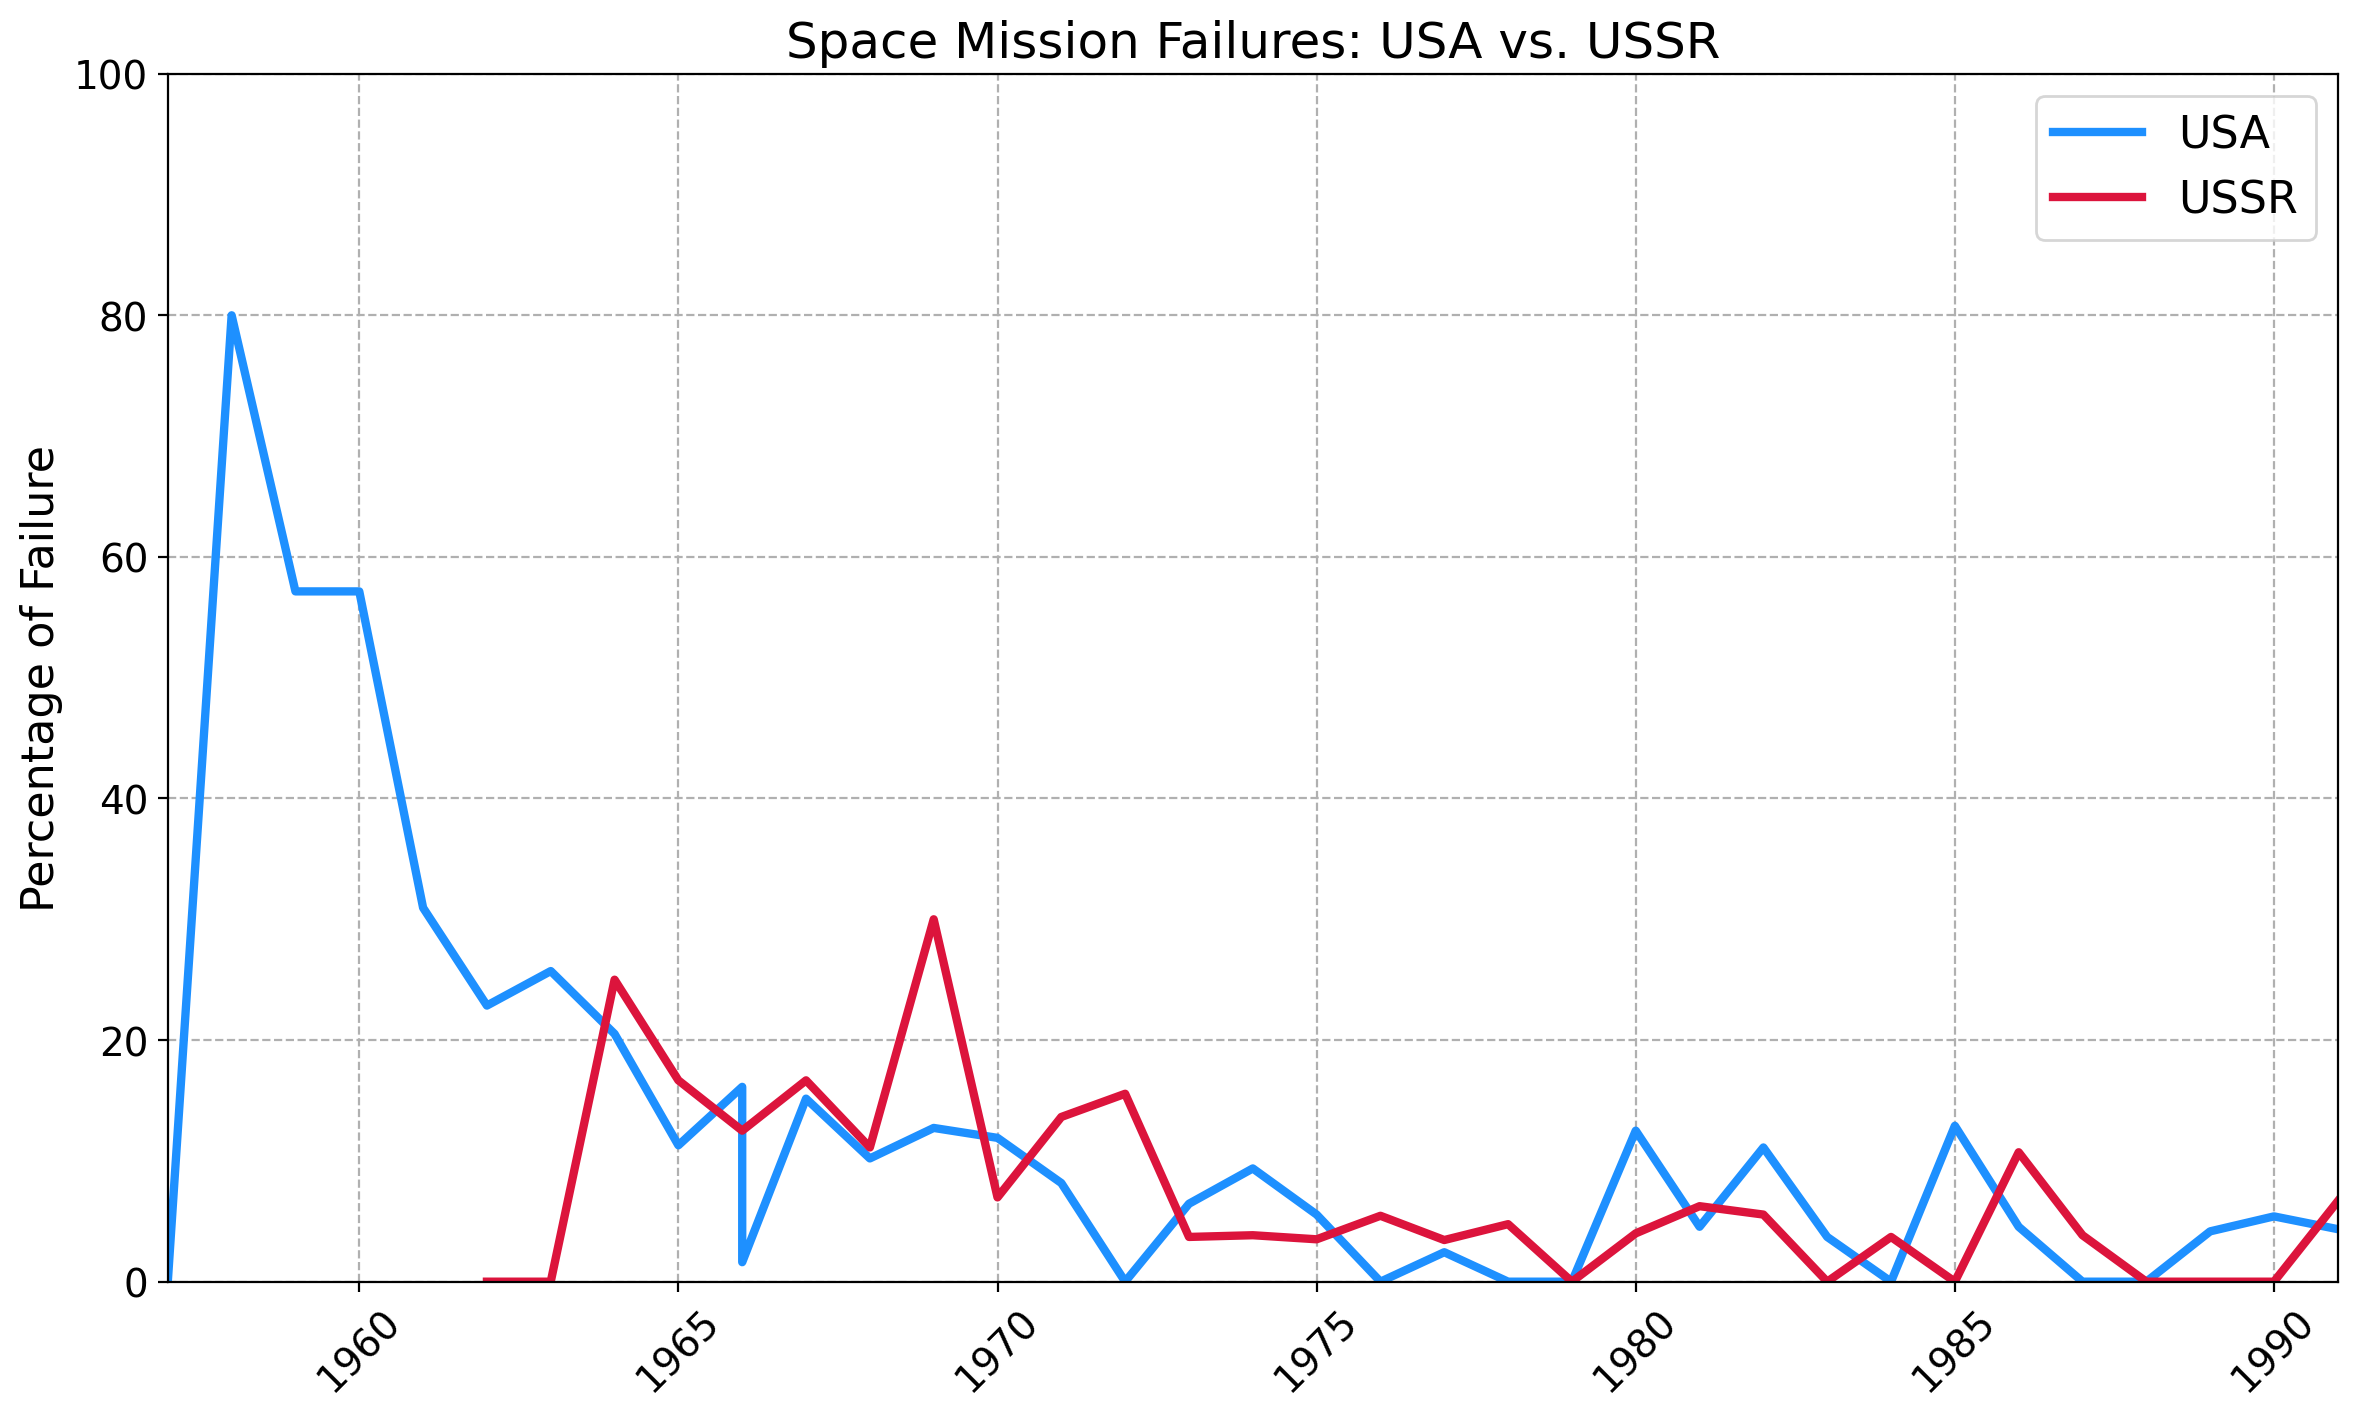

In [162]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Space Mission Failures: USA vs. USSR', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

plt.ylabel('Percentage of Failure', fontsize=16)

ax = plt.gca()
ax.set_xlim(1957, 1991)
ax.set_ylim(0,100)

plt.grid('grey', linestyle='--')

usa_line, = plt.plot(usa_fail.Year,
                    usa_fail.pct_fail,
                    c='dodgerblue',
                    linewidth=3,
                    label='USA')
ussr_line, = plt.plot(ussr_fail.Year,
                     ussr_fail.pct_fail,
                     linewidth=3,
                     c='crimson',
                     label='USSR')
plt.legend(handles=[usa_line, ussr_line], fontsize=16)
plt.show()

# Leading Country per Year

Do the results change if we only look at the number of successful launches? 

In [163]:
ntl_launch = df_data.groupby(['Year', 'Country_ISO'], as_index=False).agg({'Detail': pd.Series.count})
ntl_launch.rename(columns={'Detail': 'Nr_Launch'}, inplace=True)

ntl_launch = ntl_launch.groupby(['Country_ISO', 'Year']).sum().groupby(level=[0]).cumsum()
ntl_launch.reset_index(inplace=True)
ntl_launch

,Country_ISO,Year,Nr_Launch
0,AUS,1968,1
1,AUS,1969,3
2,AUS,1970,4
3,AUS,1971,5
4,AUS,1972,6
...,...,...,...
391,USA,2016,1245
392,USA,2017,1275
393,USA,2018,1309
394,USA,2019,1336


In [165]:
ntl_line = px.line(ntl_launch,
                    x='Year',
                    y='Nr_Launch',
                    color='Country_ISO',
                    hover_name='Country_ISO')
ntl_line.update_layout(xaxis_title='Year',
                        yaxis_title='Nr. of Space Missions',
                        title='Country Total Space Launches')
ntl_line.show()

In [174]:

#need to look at this again
ntl_launch_success = df_data.groupby(['Year', 'Country_ISO', 'Mission_Status'], as_index=False).agg({'Detail': pd.Series.count})
ntl_launch_success.rename(columns={'Detail': 'Nr_Launch'}, inplace=True)

# removed all failed and partial-failed launches.
fail_launches = ntl_launch_success[ntl_launch_success.Mission_Status != 'Success']
ntl_launch_success.drop(fail_launches.index, inplace=True)

# cumulative sum of successful launches for each country.
ntl_launch_success_cum = ntl_launch_success.groupby(['Country_ISO', 'Year']).sum()
ntl_launch_success_cum.reset_index(inplace=True)
ntl_launch_success_cum = ntl_launch_launch_success_cum.groupby()
# cumulative line plot
ntl_line_succ = px.line(ntl_launch_success_cum,
                    x='Year',
                    y='Nr_Launch',
                    #color='Country_ISO',
                    #hover_name='Country_ISO'
)
ntl_line_succ.update_layout(xaxis_title='Year',
                        yaxis_title='Nr. of Space Missions',
                        title='Country Total Successful Space Launches')
ntl_line_succ.show()

In [175]:
ntl_launch_success_cum.head()

,Country_ISO,Year,Nr_Launch
0,AUS,1969,1
1,AUS,1970,1
2,AUS,1971,1
3,AUS,1972,1
4,BRA,1997,1


# Createing a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
# Creating dataframe for launches per year per org 
orgs = df_data.groupby(['Year', 'Organisation'], as_index=False).agg({'Detail': pd.Series.count})

# Creating dataframe for total launches per year
ttl_launches = df_data.groupby('Year', as_index=False).agg({'Detail': pd.Series.count})

# Merging above 2 sets.
merge_df = pd.merge(orgs, ttl_launches, on='Year')
merge_df.columns = ['Year', 'Organisation', 'Nr_Launch', 'Total_Launch']
merge_df

,Year,Organisation,Nr_Launch,Total_Launch
0,1957,RVSN USSR,2,3
1,1957,US Navy,1,3
2,1958,AMBA,7,28
3,1958,NASA,2,28
4,1958,RVSN USSR,5,28
...,...,...,...,...
653,2020,Roscosmos,4,63
654,2020,SpaceX,14,63
655,2020,ULA,4,63
656,2020,VKS RF,3,63


In [ ]:
org_bar = px.bar(x=merge_df.Year,
                y=merge_df.Nr_Launch,
                color=merge_df.Organisation,
                title='Yearly Space Launch by Organisation')
org_bar.update_layout(xaxis_title='Year',
                     yaxis_title='Nr. of Space Launches')
org_bar.show()